## Final Data Wrangling, Feature Engineering, Data Preprocessing & MODELING

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

import os
import pandas_profiling

from collections import Counter
import math

In [3]:
bank_data = pd.read_csv('../data/interim/bank_data_clean.csv')# Loading the full CSV data file

In [4]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,other,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank_data.rename(columns={'subscribed': 'response'}, inplace=True)

In [6]:
# Show duplicate observations
bank_data.loc[bank_data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,response
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,other,no,no,no,telephone,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,other,no,no,cellular,aug,mon,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,0,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,0,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [7]:
bank_data.drop_duplicates(inplace=True)

In [8]:
# Finds all of the categorical features along with the number their unique values
cat_cols = bank_data.select_dtypes(include=[object]).columns

In [9]:
for feature in cat_cols:
    uniq = np.unique(bank_data[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))

job: 12 distinct values -  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'other'
 'retired' 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: 4 distinct values -  ['divorced' 'married' 'other' 'single']
education: 8 distinct values -  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate' 'other'
 'professional.course' 'university.degree']
default: 3 distinct values -  ['no' 'other' 'yes']
housing: 3 distinct values -  ['no' 'other' 'yes']
loan: 3 distinct values -  ['no' 'other' 'yes']
contact: 2 distinct values -  ['cellular' 'telephone']
month: 10 distinct values -  ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: 5 distinct values -  ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: 3 distinct values -  ['failure' 'nonexistent' 'success']
response: 2 distinct values -  ['no' 'yes']


In [10]:
def categories_counts(feature, df=bank_data):
    ''' Calculates the count and percentage of each value of a categorical variable'''
    counts = pd.concat([df[feature].value_counts(), round(100 * df[feature].value_counts()/df.shape[0], 2)], axis=1)
    counts.columns=['count', '%']
    counts.reset_index(inplace =True)
    counts.rename(columns={'index': feature}, inplace=True)
    return counts

In [11]:
# Aggregates cat variables based on the passed dataframe and set of features
def cat_aggergator(df, features):
    '''This function aggregates the value counts of categorical values producing a new data frame '''
    df_list = []
    for var in features:
        count = categories_counts(var, df)
        count['idx'] = var
        count.rename(columns={var:'categories'}, inplace=True)
        df_list.append(count)
    df_aggregated = pd.concat(df_list)
    df_aggregated = df_aggregated.set_index(['idx', 'categories']).sort_index()
    return df_aggregated

In [12]:
all_cat_aggregated = cat_aggergator(bank_data, cat_cols)
print('The aggregated categories count for the enire data set is: \n')
all_cat_aggregated

The aggregated categories count for the enire data set is: 



count      %
idx         categories                       
contact     cellular             26135  63.47
            telephone            15041  36.53
day_of_week fri                   7826  19.01
            mon                   8512  20.67
            thu                   8618  20.93
            tue                   8086  19.64
            wed                   8134  19.75
default     no                   32577  79.12
            other                 8596  20.88
            yes                      3   0.01
education   basic.4y              4176  10.14
            basic.6y              2291   5.56
            basic.9y              6045  14.68
            high.school           9512  23.10
            illiterate              18   0.04
            other                 1730   4.20
            professional.course   5240  12.73
            university.degree    12164  29.54
housing     no                   18615  45.21
            other                  990   2.40
            yes                  21571  52.39
job         admin.               10419  25.30
            blue-collar           9253  22.47
            entrepreneur          1456   3.54
            housemaid             1060   2.57
            management            2924   7.10
            other                  330   0.80
            retired               1718   4.17
            self-employed         1421   3.45
            services              3967   9.63
            student                875   2.13
            technician            6739  16.37
            unemployed            1014   2.46
loan        no                   33938  82.42
            other                  990   2.40
            yes                   6248  15.17
marital     divorced              4611  11.20
            married              24921  60.52
            other                   80   0.19
            single               11564  28.08
month       apr                   2631   6.39
            aug                   6176  15.00
            dec                    182   0.44
            jul                   7169  17.41
            jun                   5318  12.92
            mar                    546   1.33
            may                  13767  33.43
            nov                   4100   9.96
            oct                    717   1.74
            sep                    570   1.38
poutcome    failure               4252  10.33
            nonexistent          35551  86.34
            success               1373   3.33
response    no                   36537  88.73
            yes                   4639  11.27

#### Imputing the missing values (defined as 'other' here) of **'loan'**, **'default'** and **'housing'** whith the most frequent values

In [13]:
def impute_most_frequent(feature):
    bank_data[feature].replace({'other': bank_data[feature].value_counts().index[0]}, inplace=True)

In [14]:
impute_most_frequent('loan')
impute_most_frequent('housing')
impute_most_frequent('default')

In [15]:
cat_aggergator(bank_data, cat_cols)

count      %
idx         categories                       
contact     cellular             26135  63.47
            telephone            15041  36.53
day_of_week fri                   7826  19.01
            mon                   8512  20.67
            thu                   8618  20.93
            tue                   8086  19.64
            wed                   8134  19.75
default     no                   41173  99.99
            yes                      3   0.01
education   basic.4y              4176  10.14
            basic.6y              2291   5.56
            basic.9y              6045  14.68
            high.school           9512  23.10
            illiterate              18   0.04
            other                 1730   4.20
            professional.course   5240  12.73
            university.degree    12164  29.54
housing     no                   18615  45.21
            yes                  22561  54.79
job         admin.               10419  25.30
            blue-collar           9253  22.47
            entrepreneur          1456   3.54
            housemaid             1060   2.57
            management            2924   7.10
            other                  330   0.80
            retired               1718   4.17
            self-employed         1421   3.45
            services              3967   9.63
            student                875   2.13
            technician            6739  16.37
            unemployed            1014   2.46
loan        no                   34928  84.83
            yes                   6248  15.17
marital     divorced              4611  11.20
            married              24921  60.52
            other                   80   0.19
            single               11564  28.08
month       apr                   2631   6.39
            aug                   6176  15.00
            dec                    182   0.44
            jul                   7169  17.41
            jun                   5318  12.92
            mar                    546   1.33
            may                  13767  33.43
            nov                   4100   9.96
            oct                    717   1.74
            sep                    570   1.38
poutcome    failure               4252  10.33
            nonexistent          35551  86.34
            success               1373   3.33
response    no                   36537  88.73
            yes                   4639  11.27

## Using Label Encoder to Transform the Response Variable to Numeric (Binary)

The values of the Target variable **response** should be changes from [yes, no] to [1, 0]. Sklearn Label Encoder can do the job.

In [16]:
# Copy the data
df = bank_data.copy()

In [17]:
# Import the LabelEncoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.response = le.fit_transform(bank_data['response'])

print('The new data type fo the response varuable is:', df.response.dtypes)

The new data type fo the response varuable is: int64


In [18]:
df.response.value_counts()

0    36537
1     4639
Name: response, dtype: int64

In [19]:
# Update the list of the categorical columns
cat_cols = df.select_dtypes(include=[object]).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

## Use One Hot Encoding to Transform the Remaining Categorical Variable

Here we use the implementation of OneHotEncoder in the [**Category Encoders**](https://contrib.scikit-learn.org/category_encoders/) package.

In [20]:
from category_encoders import OneHotEncoder

In [21]:
encoder = OneHotEncoder(cols=cat_cols ,handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [22]:
df_encoded = encoder.fit_transform(df)

In [23]:
print('The new features are {}:\n\n {}'.format(len(df_encoded.columns),  encoder.get_feature_names()))

The new features are 61:

 ['age', 'job_housemaid', 'job_services', 'job_admin.', 'job_blue-collar', 'job_technician', 'job_retired', 'job_management', 'job_unemployed', 'job_self-employed', 'job_other', 'job_entrepreneur', 'job_student', 'marital_married', 'marital_single', 'marital_divorced', 'marital_other', 'education_basic.4y', 'education_high.school', 'education_basic.6y', 'education_basic.9y', 'education_professional.course', 'education_other', 'education_university.degree', 'education_illiterate', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_telephone', 'contact_cellular', 'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_oct', 'month_nov', 'month_dec', 'month_mar', 'month_apr', 'month_sep', 'day_of_week_mon', 'day_of_week_tue', 'day_of_week_wed', 'day_of_week_thu', 'day_of_week_fri', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_nonexistent', 'poutcome_failure', 'poutcome_success', 'emp_var_rate', 'cons_price_idx',

### Drop the **'duration'** Feature
The duration feature is not know before the call is made. Thus, this feature is not practical in modeling.

In [24]:
df_encoded = df_encoded.drop('duration', axis=1)

In [25]:
print('The new features are {}:\n'.format(len(df_encoded.columns)))

The new features are 60:



## Prepare the Data for Modeling: Train_Test_Split

In [26]:
# Get the name of dataframe
def get_df_name(df):
    '''Function to get the name of DataFrame'''
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [172]:
y = df_encoded.response
X = df_encoded.drop('response', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

data_sets =[X_train, X_test, y_train, y_test]

for d in data_sets:
    print(f'The shape of {get_df_name(d)}: {d.shape} {round(d.shape[0]/df_encoded.shape[0] *100, 0)}% \n')

The shape of X_train: (28823, 59) 70.0% 

The shape of X_test: (12353, 59) 30.0% 

The shape of y_train: (28823,) 70.0% 

The shape of y_test: (12353,) 30.0% 



In [28]:
# Bar plot for the distribution of the categorical fatures.
def distibution_bar_plot(feature, response= 'response'):

    fig, ax = plt.subplots(figsize=(8, 2))    
    # Ploting just the distribution of each variable values in the first subplot
    sns.countplot(y=feature, data=bank_data, order = bank_data[feature].value_counts().index, ax=ax)
    ax.set_title(f'The Percentage Count of "{feature}" Categories', )
    ax.set_xlabel('Percentage Count')
    ax.set_ylabel(f'{feature}')
    #ax.axis("off")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel(f'{feature}')
    total = len(bank_data[feature])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
        
    plt.show()
    

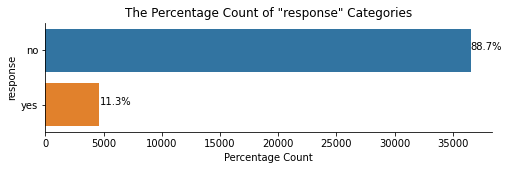

In [29]:
distibution_bar_plot('response')

### This is imbalanced dataset, we will do over-sampling to the training data set to cope with this issue.

### Over-Sampling Using SMOTE

[Synthetic Minority Oversampling Technique](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/), or SMOTE for short is a method for oversampling the minority class. SMOTE allows augmenting new examples synthesized from the existing examples. This is a type of data augmentation for the minority class.

In [30]:
from imblearn.over_sampling import SMOTE


In [31]:
# Adding data points to the minority calss to be increased to the half of the majority class.
oversample = SMOTE(sampling_strategy=0.5, n_jobs=-1, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [32]:
print('The resampled training data new classes ratio is:{}%'.format( y_train.value_counts()[1] / y_train.value_counts()[0] * 100))

The resampled training data new classes ratio is:50.0%


In [33]:
y_train.value_counts()

0    25576
1    12788
Name: response, dtype: int64

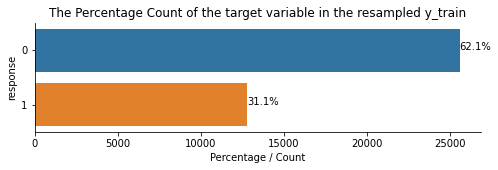

In [34]:
fig, ax = plt.subplots(figsize=(8, 2))    
# Ploting just the distribution of each variable values in the first subplot
sns.countplot(y='response', data= y_train.to_frame(), ax=ax)
ax.set_title(f'The Percentage Count of the target variable in the resampled y_train' )
ax.set_xlabel('Percentage / Count')
ax.set_ylabel('response')
#ax.axis("off")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(f'{feature}')
total = len(bank_data[feature])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

# Modeling

We try:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (avoided for long processing time)
- Gradient Boosting (LightGBM)
- XGBoosting 

# Bayesian Hyperparameter Optimization using hyperopt

In [35]:

from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

from eli5.sklearn import PermutationImportance
import eli5

 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

 

In [36]:
# RepeatedStratifiedKFold is used for cross validation

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

### Optimizing the Hyperparameters of Various Classification Algorithms using Deferent Loss Functions

- The point is to deal with remaining imbalance in data and give more weight to the minority class. It is important to the bank to predict more accurately the customers who might potentially subscribe to the term deposit service. The Accuracy score can be misleading with imbalanced dataset.

# Logistic Regression

- Loss function = (1 - F1)

- With Logistic Regression F1 score is used with cross_val_score as an attempt to balance **Precision** and **Recall**.

$Precision =  \frac{TP}{TP + FP}$ & 
$Recall =  \frac{TP}{TP + FN}$

$F =  2 * \frac{Precision * Recall}{Precision + Recall}$


In [92]:

def hyperopt_train_test(params):
    clf = LogisticRegression(**params)
    cv_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring='f1').mean()
    
    return {'model': clf, 'score': cv_score}


space = { 
             'warm_start' : hp.choice('warm_start', [True, False]),
             'fit_intercept' : hp.choice('fit_intercept', [True, False]),
             'tol' : hp.uniform('tol', 0.00001, 0.0001),
             'C' : hp.uniform('C', 0.05, 3),
             'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
             'max_iter' : hp.choice('max_iter', range(100,1000)),
             'multi_class' : 'auto',
             'class_weight' : 'balanced'
      }

best = 0

def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    f1 = hyperopt_train_test(params)['score']
    if f1 > best:
      best = f1
      print( 'new best:', best, params)
    return {'loss': 1-f1, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=20, trials=trials)
print(best)
best = 0


new best:                                             
0.6493383850576929                                    
{'C': 1.2337942413297507, 'class_weight': 'balanced', 'fit_intercept': False, 'max_iter': 551, 'multi_class': 'auto', 'solver': 'lbfgs', 'tol': 4.463027404614427e-05, 'warm_start': True}
new best:                                                                       
0.6555462856170895                                                              
{'C': 1.7089652730767702, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 825, 'multi_class': 'auto', 'solver': 'liblinear', 'tol': 6.038434192657617e-05, 'warm_start': True}
new best:                                                                       
0.6557462825575652                                                              
{'C': 0.7541357544519206, 'class_weight': 'balanced', 'fit_intercept': False, 'max_iter': 945, 'multi_class': 'auto', 'solver': 'liblinear', 'tol': 2.8638406331066273e-05, 'warm_start': Tru

In [55]:
def getBestModelfromTrials(trials):
    valid_trial_list = [trial for trial in trials
                            if STATUS_OK == trial['result']['status']]
    losses = [ float(trial['result']['loss']) for trial in valid_trial_list]
    index_having_minumum_loss = np.argmin(losses)
    best_trial_obj = valid_trial_list[index_having_minumum_loss]
    return best_trial_obj['result']['Trained_Model']


In [96]:
lr_model = getBestModelfromTrials(trials)
lr_model

LogisticRegression(C=0.10356811639859197, class_weight='balanced', max_iter=582,
                   solver='newton-cg', tol=9.00695967772851e-05,
                   warm_start=True)

In [38]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.10356811639859197, class_weight='balanced', max_iter=582,
                   solver='newton-cg', tol=9.00695967772851e-05,
                   warm_start=True)

In [39]:
def plot_roc_curve(X_test, y_test, model, model_name):
    
    y_pred_proba = model.predict_proba(X_test)
    rf_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    print('Area Under the Receiver Operating Characteristic Curve = ', rf_auc)
    fpr, tpr, _ =  roc_curve(y_test, y_pred_proba[:,1])

    plt.plot(fpr, tpr, marker='.', label=f'{model_name} (AUROC = %0.3f)' % rf_auc)

    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     10961
           1       0.35      0.64      0.46      1392

    accuracy                           0.83     12353
   macro avg       0.65      0.75      0.68     12353
weighted avg       0.88      0.83      0.85     12353

Area Under the Receiver Operating Characteristic Curve =  0.7957822247529645


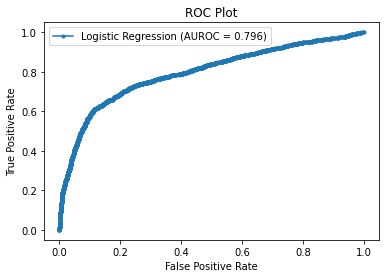

In [40]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_roc_curve(X_test, y_test, lr_model, 'Logistic Regression')

In [169]:
# Model performance as a Dataframe
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba[:,1])
target_names = [' Not Subscrided 0', 'Subscrided 1', ]
report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
report['ROC AUC'] = auc
lr_report = pd.DataFrame(report).transpose().round(2)
lr_report['model'] = 'Logistic Regression_F1'
lr_report.set_index(['model', lr_report.index], inplace=True)
lr_report

precision  recall  f1-score  \
model                                                                   
Logistic Regression_F1  Not Subscrided 0       0.95    0.85      0.90   
                       Subscrided 1            0.35    0.64      0.46   
                       accuracy                0.83    0.83      0.83   
                       macro avg               0.65    0.75      0.68   
                       weighted avg            0.88    0.83      0.85   
                       ROC AUC                 0.80    0.80      0.80   

                                           support  
model                                               
Logistic Regression_F1  Not Subscrided 0  10961.00  
                       Subscrided 1        1392.00  
                       accuracy               0.83  
                       macro avg          12353.00  
                       weighted avg       12353.00  
                       ROC AUC                0.80

In [41]:
import itertools

# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[9316 1645]
 [ 497  895]]


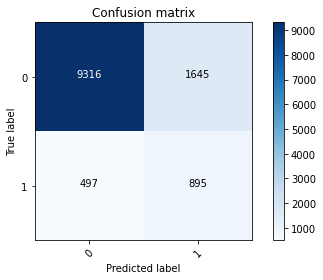

In [42]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


## Feature Importance

In [104]:
hasattr(lr_model, 'feature_importances_')

False

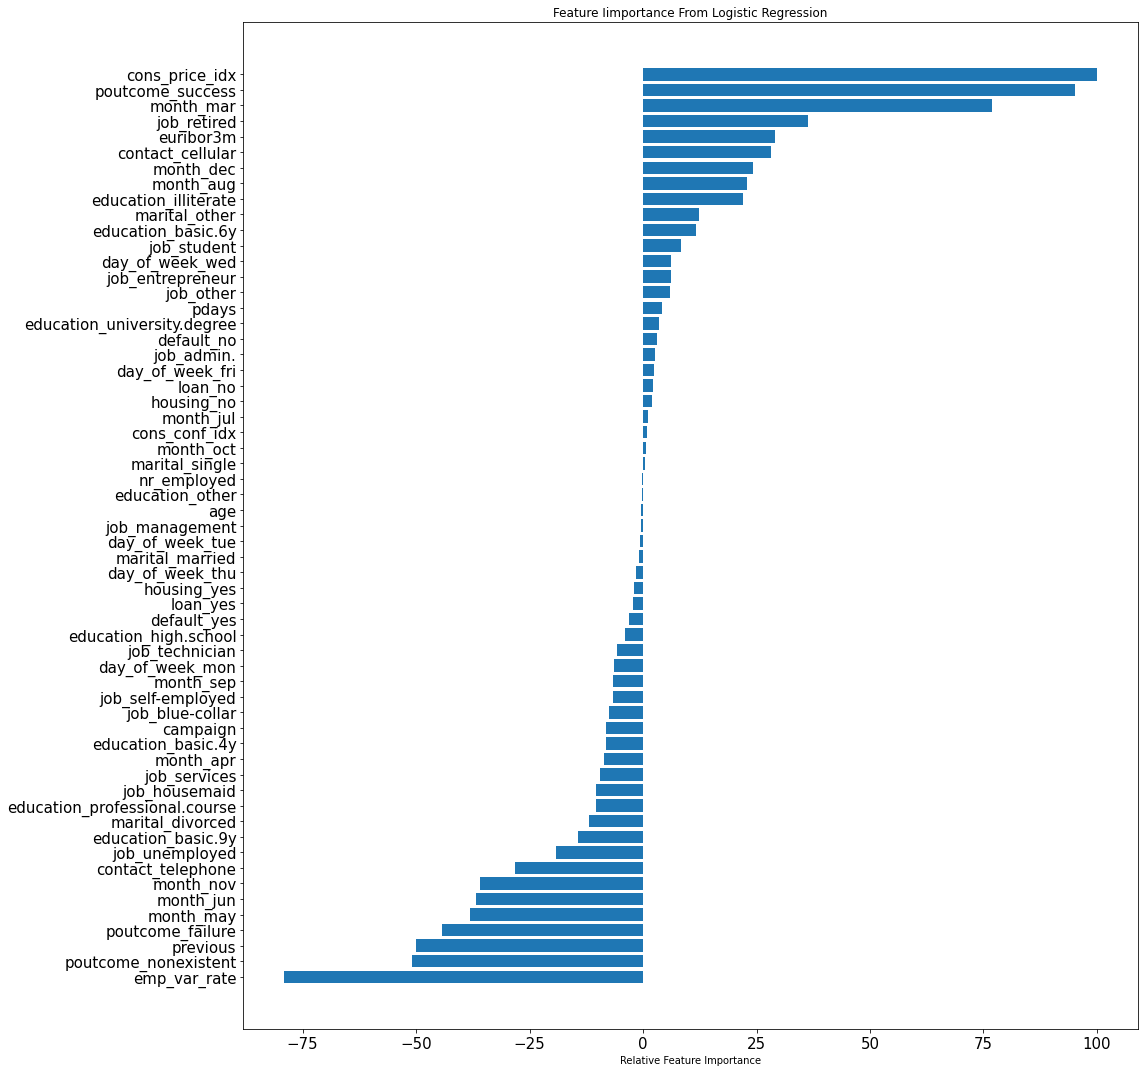

In [141]:
feature_importance = (lr_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(16, 15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
featax.tick_params(axis='both', which='major', labelsize=15)
featax.set_title('Feature Iimportance From Logistic Regression')
plt.tight_layout()   
plt.show()

### Permutation Importances 

- [Permutation Importance](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html) \
"eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance” or “Mean Decrease Accuracy (MDA)”.

In [120]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2046 ± 0.0018,emp_var_rate
0.1382 ± 0.0039,cons_price_idx
0.0691 ± 0.0028,euribor3m
0.0270 ± 0.0018,month_may
0.0270 ± 0.0021,poutcome_nonexistent
0.0185 ± 0.0006,month_nov
0.0182 ± 0.0013,poutcome_success
0.0145 ± 0.0010,previous
0.0110 ± 0.0009,cons_conf_idx
0.0109 ± 0.0018,poutcome_failure


1. Precision: It is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high.

2. Recall: It is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.




## Insights

- The exploratory data analysis showed overlap between the two classes across all features and none of the features is a strong predictor nor has a strong relationship to the target variable. So the classes are hard to classify .
- However, the simple logistic regression model gave AUC = 0.796 on the test dataset which is close to the 0.8 reported by the published paper using Neural Networks Model (S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014).

- This model was able to give 0.64 recall on the test dataset to the minority class (1, the subscribed class)
-  The Logistic regression model is explainable. The Features importance are shown bellow and colored based on their effect, positive green and negative red, ranked based on the strength of the effect from top to bottom for each effect:

<font color='green'>cons_price_idx +  </font>effect\
<font color='green'>poutcome_success + </font>effect\
<font color='green'>month_mar + </font>effect\
<font color='green'>euribor3m + </font>effect\
<font color='green'>contact_cellular + </font>effect\
<font color='green'>month_dec + </font>effect\
<font color='green'>month_aug + </font>effect\

<font color='red'>emp_var_rate - </font>effect\
<font color='red'>poutcome_nonexistent - </font>effect\
<font color='red'>previous - </font>effect\
<font color='red'>poutcome_failure - </font>effect\
<font color='red'>month_may - </font>effect\
<font color='red'>month_jun - </font>effect\
<font color='red'>contact_telephone - </font>effect\
<font color='red'>job_unemployed - </font>effect\
<font color='red'>education_basic.9y - </font>effect\
<font color='red'>marital_divorced - </font>effect
- The Permutation Importance shows some matching features from the feature importance:

0.0691 ± 0.0028	euribor3m               \ 
0.0270 ± 0.0018	month_may               \
0.0270 ± 0.0021	poutcome_nonexistent    \
0.0185 ± 0.0006	month_nov               \
0.0182 ± 0.0013	poutcome_success\
0.0145 ± 0.0010	previous\
0.0110 ± 0.0009	cons_conf_idx\
0.0109 ± 0.0018	poutcome_failur

## Decision Tree

- Loss function is (1 - recall_micro)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer

def hyperopt_train_test(params):
    dt_clf = DecisionTreeClassifier(**params)
    cv_score = cross_val_score(dt_clf, X_train, y_train, cv=cv,scoring='recall_micro').mean()
    
    return {'model': dt_clf, 'score': cv_score}

space={"splitter":hp.choice('splitter', ["best","random"]),
            "max_depth" : hp.choice('max_depth', range(1,100)),
           "min_samples_leaf":hp.choice('min_samples_leaf', range(1,5)),
           "min_weight_fraction_leaf":hp.uniform('min_weight_fraction_leaf', 0.1, 0.5),
           "max_features": hp.choice('max_features', ["auto","log2","sqrt",None]),
           "max_leaf_nodes":hp.choice('max_leaf_nodes',range(3,100)),
           'criterion': hp.choice('criterion', ["gini", "entropy"])
      }

best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    score = hyperopt_train_test(params)['score']
    if score > best:
      best = score
      print( 'new best:', best, params)
    return {'loss': 1-score, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)
print(best)



new best:                                              
0.7702637405079659                                     
{'criterion': 'entropy', 'max_depth': 80, 'max_features': None, 'max_leaf_nodes': 38, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.10027410071418581, 'splitter': 'random'}
new best:                                                                          
0.7735116051612801                                                                 
{'criterion': 'entropy', 'max_depth': 80, 'max_features': None, 'max_leaf_nodes': 69, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.14885924246706167, 'splitter': 'best'}
100%|██████████| 100/100 [03:37<00:00,  2.17s/trial, best loss: 0.22648839483871985]
{'criterion': 1, 'max_depth': 79, 'max_features': 3, 'max_leaf_nodes': 66, 'min_samples_leaf': 0, 'min_weight_fraction_leaf': 0.14885924246706167, 'splitter': 0}


In [60]:
dt_model = getBestModelfromTrials(trials)
dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=80, max_leaf_nodes=69,
                       min_weight_fraction_leaf=0.14885924246706167)

In [61]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=80, max_leaf_nodes=69,
                       min_weight_fraction_leaf=0.14885924246706167)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10961
           1       0.46      0.48      0.47      1392

    accuracy                           0.88     12353
   macro avg       0.70      0.70      0.70     12353
weighted avg       0.88      0.88      0.88     12353

Area Under the Receiver Operating Characteristic Curve =  0.777259362347382


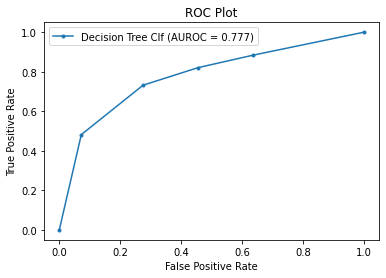

In [62]:
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_roc_curve(X_test, y_test, dt_model, 'Decision Tree Clf')

In [168]:
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba[:,1])
target_names = [' Not Subscrided 0', 'Subscrided 1', ]
report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
report['ROC AUC'] = auc
dt_report = pd.DataFrame(report).transpose().round(2)
dt_report['model'] = 'DT_recall_micro'
dt_report.set_index(['model', dt_report.index], inplace=True)
dt_report

precision  recall  f1-score   support
model                                                                   
DT_recall_micro  Not Subscrided 0       0.93    0.93      0.93  10961.00
                Subscrided 1            0.46    0.48      0.47   1392.00
                accuracy                0.88    0.88      0.88      0.88
                macro avg               0.70    0.70      0.70  12353.00
                weighted avg            0.88    0.88      0.88  12353.00
                ROC AUC                 0.78    0.78      0.78      0.78

Confusion matrix, without normalization
[[10168   793]
 [  721   671]]


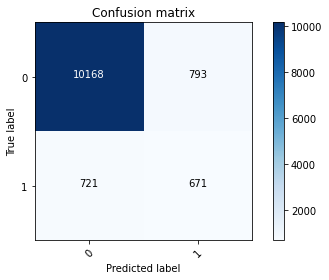

In [63]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


## Insights

- The decision tree model gave a lower performance than the logistic regression model. AUC = 0.78 & recall in the minority class = 0.48, but slightly better F1_score 0.47, F1 = 0.46 in logistic regression model.
- The performance can be improved by optimizing the hyperparameters but it is better to invest time in more promising classification algorithms.

# Random Forest

- Optimizing on the Geometric mean as a loss function

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [76]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials , space_eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.metrics import geometric_mean_score

# custom loss function of the geometric mean
metric = make_scorer(geometric_mean_score)

def hyperopt_train_test(params):
    rf_clf = RandomForestClassifier(**params)
    cv_score = cross_val_score(rf_clf, X_train, y_train, cv=cv,scoring=metric).mean()
    
    return {'model': rf_clf, 'score': cv_score}

space = {
    'max_depth': hp.choice('max_depth', range(1,50)),
    'max_features': hp.choice('max_features', range(1,15)),
    'n_estimators': hp.choice('n_estimators', range(1,100)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
            }
best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    gmean = hyperopt_train_test(params)['score']
    if gmean > best:
      best = gmean
      print( 'new best:', best, params)
    return {'loss': 1-gmean, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)
print(best)

new best:                                              
0.8892285983910634                                     
{'criterion': 'gini', 'max_depth': 16, 'max_features': 9, 'n_estimators': 62}
new best:                                                                            
0.8961186500353503                                                                  
{'criterion': 'entropy', 'max_depth': 44, 'max_features': 6, 'n_estimators': 90}    
new best:                                                                           
0.8967655478822699                                                                
{'criterion': 'entropy', 'max_depth': 43, 'max_features': 6, 'n_estimators': 71}  
new best:                                                                            
0.8970792880069146                                                                   
{'criterion': 'gini', 'max_depth': 34, 'max_features': 8, 'n_estimators': 99}        
new best:                                    

In [78]:
rf_model = getBestModelfromTrials(trials)


In [79]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_features=12, n_estimators=89)

In [80]:
rf_model.score(X_test, y_test)

0.8921719420383712

In [81]:
 # Sort the trials with lowest loss (highest AUC) first
bayes_trials_results = sorted(trials.results, key = lambda x: x['loss'])
bayes_trials_results[:2]

[{'loss': 0.10287524823919536,
  'status': 'ok',
  'Trained_Model': RandomForestClassifier(max_depth=25, max_features=12, n_estimators=89)},
 {'loss': 0.10288943233749248,
  'status': 'ok',
  'Trained_Model': RandomForestClassifier(max_depth=37, max_features=7, n_estimators=89)}]

In [82]:
trials.best_trial

{'state': 2,
 'tid': 47,
 'spec': None,
 'result': {'loss': 0.10287524823919536,
  'status': 'ok',
  'Trained_Model': RandomForestClassifier(max_depth=25, max_features=12, n_estimators=89)},
 'misc': {'tid': 47,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'criterion': [47],
   'max_depth': [47],
   'max_features': [47],
   'n_estimators': [47]},
  'vals': {'criterion': [0],
   'max_depth': [24],
   'max_features': [11],
   'n_estimators': [88]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2021, 7, 13, 21, 18, 2, 836000),
 'refresh_time': datetime.datetime(2021, 7, 13, 21, 21, 45, 623000)}

In [83]:
y_pred_proba = rf_model.predict_proba(X_test)


In [145]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score


Area Under the Receiver Operating Characteristic Curve =  0.780605473481214


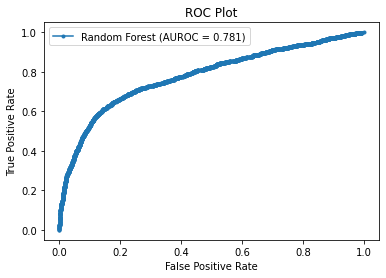

In [84]:
plot_roc_curve(X_test, y_test, rf_model, 'Random Forest')

Confusion matrix, without normalization
[[10595   366]
 [  966   426]]


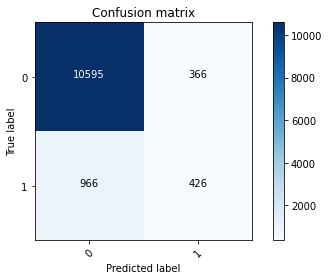

In [85]:
y_pred = rf_model.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10961
           1       0.54      0.31      0.39      1392

    accuracy                           0.89     12353
   macro avg       0.73      0.64      0.67     12353
weighted avg       0.87      0.89      0.88     12353



In [88]:
rf_model

RandomForestClassifier(max_depth=25, max_features=12, n_estimators=89)

In [89]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0032 ± 0.0013,poutcome_failure
0.0017 ± 0.0004,month_apr
0.0012 ± 0.0005,month_oct
0.0008 ± 0.0015,cons_price_idx
0.0005 ± 0.0009,education_university.degree
0.0003 ± 0.0011,day_of_week_wed
0.0003 ± 0.0002,poutcome_success
0.0002 ± 0.0009,housing_no
0.0002 ± 0.0005,month_jun
0.0001 ± 0.0002,month_nov


### Random forest 2: Class_weight = Balanced & metric = recall_weighted

In [251]:


def hyperopt_train_test(params):
    rf_clf = RandomForestClassifier(**params)
    cv_score = cross_val_score(rf_clf, X_train, y_train, cv=cv,scoring='recall_weighted').mean()
    
    return {'model': rf_clf, 'score': cv_score}

space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,6)),
    'n_estimators': hp.choice('n_estimators', range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'class_weight': 'balanced'
            }
best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    gmean = hyperopt_train_test(params)['score']
    if gmean > best:
      best = gmean
      print( 'new best:', best, params)
    return {'loss': 1-gmean, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)
print(best)

new best:                                              
0.8394275765121446                                     
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'n_estimators': 11}
new best:                                                                        
0.8996194094727297                                                               
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 14, 'max_features': 5, 'n_estimators': 14}
new best:                                                                         
0.8999113700832259                                                                
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 18, 'max_features': 3, 'n_estimators': 6}
new best:                                                                          
0.908278561514741                                                                  
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 18, 'ma

In [252]:
rf_model_recall_weighted = getBestModelfromTrials(trials)
rf_model_recall_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=4,
                       n_estimators=14)

In [90]:
rf_model_recall_weighted = RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=4,
                       n_estimators=14)
rf_model_recall_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=17, max_features=4,
                       n_estimators=14)

Confusion matrix, without normalization
[[10353   608]
 [  810   582]]


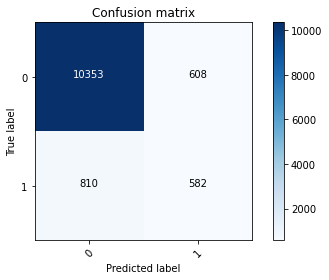

In [91]:

y_pred = rf_model_recall_weighted.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10961
           1       0.49      0.42      0.45      1392

    accuracy                           0.89     12353
   macro avg       0.71      0.68      0.69     12353
weighted avg       0.88      0.89      0.88     12353



Area Under the Receiver Operating Characteristic Curve =  0.7822981584656992


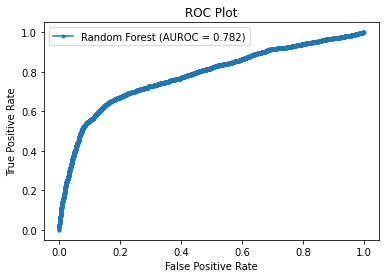

In [93]:
plot_roc_curve(X_test, y_test, rf_model_recall_weighted, 'Random Forest')

## recall_micro

In [241]:
def hyperopt_train_test(params):
    rf_clf = RandomForestClassifier(**params)
    cv_score = cross_val_score(rf_clf, X_train, y_train, cv=cv,scoring='recall_micro').mean()
    
    return {'model': rf_clf, 'score': cv_score}

space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,6)),
    'n_estimators': hp.choice('n_estimators', range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'class_weight': 'balanced'
            }
best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    gmean = hyperopt_train_test(params)['score']
    if gmean > best:
      best = gmean
      print( 'new best:', best, params)
    return {'loss': 1-gmean, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=20, trials=trials)
print(best)

new best:                                             
0.8692627922048888                                    
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 18, 'max_features': 4, 'n_estimators': 2}
new best:                                                                        
0.8917839520157013                                                               
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14, 'max_features': 3, 'n_estimators': 12}
100%|██████████| 20/20 [01:44<00:00,  5.22s/trial, best loss: 0.10821604798429874]
{'criterion': 0, 'max_depth': 13, 'max_features': 2, 'n_estimators': 11}


In [248]:
rf_model_recall_micro = getBestModelfromTrials(trials)
rf_model_recall_micro.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=3,
                       n_estimators=12)

Confusion matrix, without normalization
[[10205   756]
 [  694   698]]


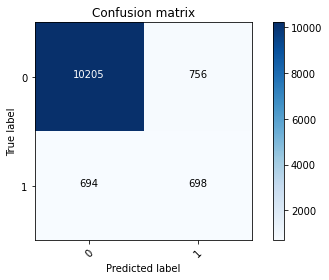

In [96]:
y_pred = rf_model_recall_micro.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10961
           1       0.48      0.50      0.49      1392

    accuracy                           0.88     12353
   macro avg       0.71      0.72      0.71     12353
weighted avg       0.88      0.88      0.88     12353



Area Under the Receiver Operating Characteristic Curve =  0.7955177683259456


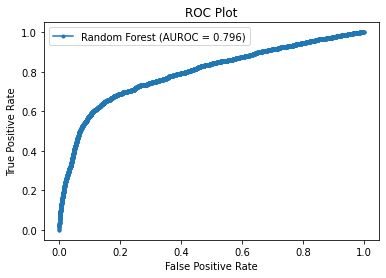

In [98]:
plot_roc_curve(X_test, y_test, rf_model_recall_micro, 'Random Forest')

### Features Importance

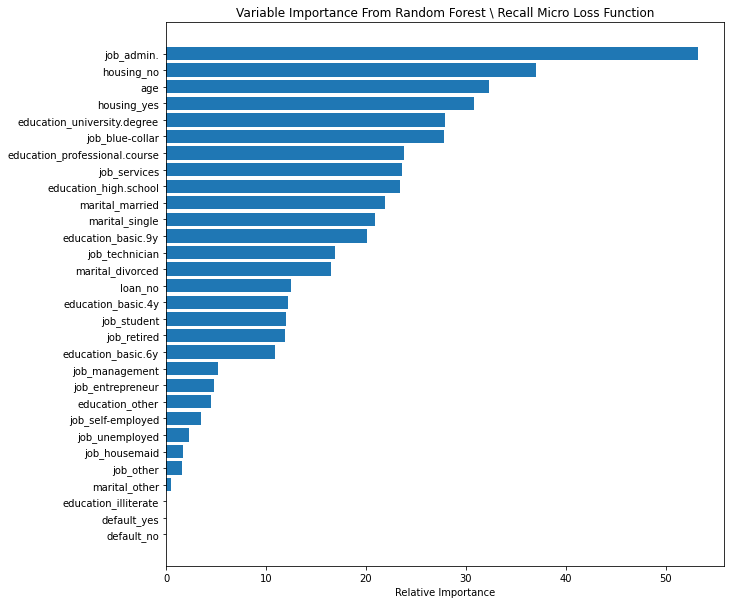

In [99]:
feature_importance = rf_model_recall_micro.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance From Random Forest \ Recall Micro Loss Function')
plt.show();

In [165]:
y_pred_proba = rf_model_recall_micro.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba[:,1])
target_names = [' Not Subscrided 0', 'Subscrided 1', ]
report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
report['ROC AUC'] = auc
rf_report = pd.DataFrame(report).transpose().round(2)
rf_report['model'] = 'RF_Recall_Micro'
rf_report.set_index(['model', rf_report.index], inplace=True)
rf_report

precision  recall  f1-score   support
model                                                                   
RF_Recall_Micro  Not Subscrided 0       0.93    0.95      0.94  10961.00
                Subscrided 1            0.50    0.40      0.45   1392.00
                accuracy                0.89    0.89      0.89      0.89
                macro avg               0.72    0.68      0.69  12353.00
                weighted avg            0.88    0.89      0.88  12353.00
                ROC AUC                 0.80    0.80      0.80      0.80

In [116]:
report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
report['AUC'] = 5
report

{' Not Subscrided 0': {'precision': 0.93632443343426,
  'recall': 0.9310281908584983,
  'f1-score': 0.9336688014638609,
  'support': 10961},
 'Subscrided 1': {'precision': 0.48005502063273725,
  'recall': 0.5014367816091954,
  'f1-score': 0.4905130007027407,
  'support': 1392},
 'accuracy': 0.8826196065733021,
 'macro avg': {'precision': 0.7081897270334986,
  'recall': 0.7162324862338468,
  'f1-score': 0.7120909010833008,
  'support': 12353},
 'weighted avg': {'precision': 0.8849096335783773,
  'recall': 0.8826196065733021,
  'f1-score': 0.8837317113109038,
  'support': 12353},
 'AUC': 5}

## Insights

- Random Forest with Recall Micro as a loss function gave the best results. AUC = 0.796 & recall in the minority class = 0.5, F1 = 0.49 in logistic regression model.
- This model was trained ignoring the class_weight parameter. We might get a better results by setting class_weight to 'balanced' or "balanced_subsample"

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC


### This model is skipped because it takes long time to optimize and train 

In [ ]:
'''
def hyperopt_train_test(params):
#     X_ = X_train.copy()
#     if 'normalize' in params:
#         if params['normalize'] == 1:
#             X_ = normalize(X_)
#             del params['normalize']
#     if 'scale' in params:
#         if params['scale'] == 1:
#             X_ = scale(X_)
#             del params['scale']
    clf = SVC(**params)
    cv_score = cross_val_score(clf, X_train, y_train, cv=cv,scoring='recall_micro').mean()
    
    return {'model': clf, 'score': cv_score}

space = {
             'C': hp.uniform('C', 0, 20),
             'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
             'gamma': hp.uniform('gamma', 0, 20),
             
         }
best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    score = hyperopt_train_test(params)['score']
    if score > best:
      best = score
      print( 'new best:', best, params)
    return {'loss': 1-score, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=5, trials=trials)
print(best)

'''

## Tuning LightGBM

In [276]:
import lightgbm as lgbm


def hyperopt_train_test(params):
    

    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMClassifier(
        n_estimators=20,
        learning_rate=0.01,
        class_weight= 'balanced',
        objective = 'binary',
        **params
    )

    
    cv_score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='recall_micro').mean()
    return {'model':clf, 'score': cv_score}

space = {
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart','goss']),

    'min_child_weight': hp.loguniform('min_child_weight', -16, 5), #also aliases to min_sum
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'min_data_in_leaf': hp.qloguniform('min_data_in_leaf', 0, 6, 1),
    }

best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    score = hyperopt_train_test(params)['score']
    if score > best:
      best = score
      print( 'new best:', best, params)
    return {'loss': 1-score, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=20, trials=trials)
print(best)

new best:                                             
0.8433061408535844                                    
{'boosting_type': 'dart', 'colsample_bytree': 0.9630304344335756, 'gamma': 0.32584284331808594, 'max_depth': 4.0, 'min_child_weight': 3.005492807354326e-06, 'min_data_in_leaf': 37.0, 'num_leaves': 20.0}
new best:                                                                        
0.8848503684289277                                                               
{'boosting_type': 'dart', 'colsample_bytree': 0.8367737454591424, 'gamma': 0.22001526964480067, 'max_depth': 6.0, 'min_child_weight': 1.6018351372165862e-05, 'min_data_in_leaf': 19.0, 'num_leaves': 60.0}
new best:                                                                        
0.890767365817085                                                                
{'boosting_type': 'gbdt', 'colsample_bytree': 0.3069827938328667, 'gamma': 0.30334766165663246, 'max_depth': 7.0, 'min_child_weight': 0.31720130887554704, 

In [134]:
lgbm_model = getBestModelfromTrials(trials)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', colsample_bytree='0.401',
               learning_rate=0.01, n_estimators=20, num_leaves=128,
               objective='binary')

Confusion matrix, without normalization
[[10055   906]
 [  598   794]]


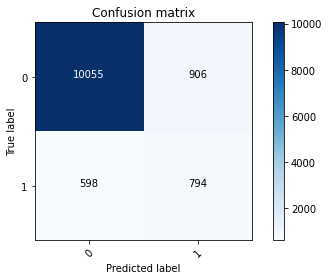

In [135]:
y_pred = lgbm_model.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10961
           1       0.47      0.57      0.51      1392

    accuracy                           0.88     12353
   macro avg       0.71      0.74      0.72     12353
weighted avg       0.89      0.88      0.88     12353



Area Under the Receiver Operating Characteristic Curve =  0.8083024505902325


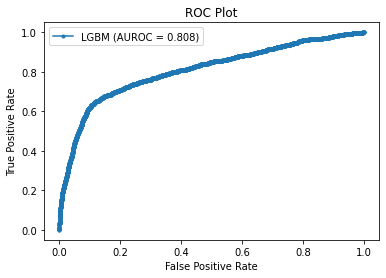

In [137]:
plot_roc_curve(X_test, y_test, lgbm_model, 'LGBM')

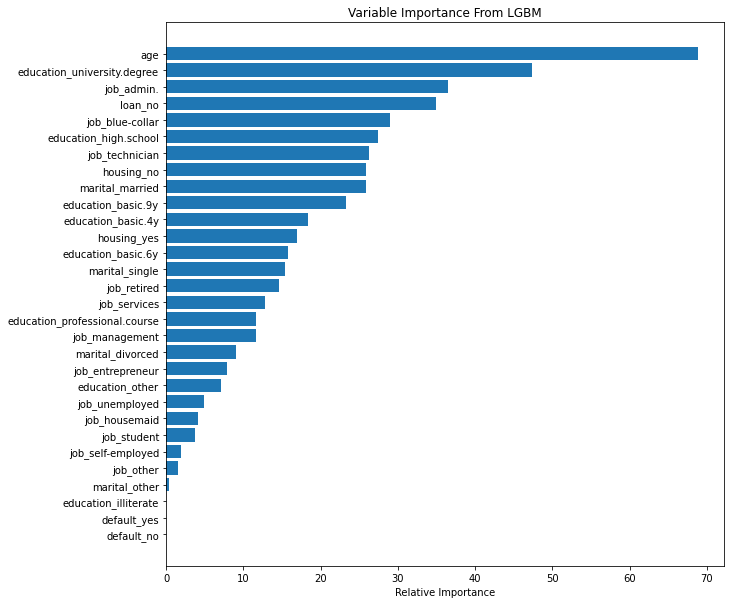

In [138]:
lgbm_model.feature_importances_

feature_importance = lgbm_model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance From LGBM')
plt.show();

In [285]:
perm = PermutationImportance(lgbm_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0027 ± 0.0007,contact_telephone
0.0023 ± 0.0009,contact_cellular
0.0021 ± 0.0005,month_apr
0.0011 ± 0.0005,poutcome_failure
0.0009 ± 0.0005,cons_price_idx
0.0006 ± 0.0003,poutcome_nonexistent
0.0004 ± 0.0004,pdays
0.0004 ± 0.0002,month_oct
0.0004 ± 0.0005,poutcome_success
0.0003 ± 0.0007,campaign


In [166]:
y_pred = lgbm_model.predict(X_test)
y_pred_proba = lgbm_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba[:,1])
target_names = [' Not Subscrided 0', 'Subscrided 1', ]
report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
report['ROC AUC'] = auc
lgbm_report = pd.DataFrame(report).transpose().round(2)
lgbm_report['model'] = 'lgbm_recall_micro'
lgbm_report.set_index(['model', lgbm_report.index], inplace=True)
lgbm_report

precision  recall  f1-score   support
model                                                                     
lgbm_recall_micro  Not Subscrided 0       0.94    0.92      0.93  10961.00
                  Subscrided 1            0.47    0.57      0.51   1392.00
                  accuracy                0.88    0.88      0.88      0.88
                  macro avg               0.71    0.74      0.72  12353.00
                  weighted avg            0.89    0.88      0.88  12353.00
                  ROC AUC                 0.81    0.81      0.81      0.81

## Insights

- The Light Gradient Boosting model gave the best balanced performance so far. AUC = 0.81 & recall in the minority class = 0.57, F1 = 0.51 in logistic regression model.

- This model has more chance to predict the customers who are likely to subscribe to the term deposit service.

## Tuning XGBoost

In [141]:
import xgboost as xgb

In [339]:

def hyperopt_train_test(params):
    

    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = xgb.XGBClassifier(
        objective="binary:logistic", eval_metric="aucpr",
        n_estimators=20,
        scale_pos_weight=2,
        n_jobs=4,

        **params
    )

    
    cv_score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='recall_micro').mean()
    return {'model':clf, 'score': cv_score}

space = {
    'booster': hp.choice('booster', ['gbtree', 'gblinear', 'dart']),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),


    'min_child_weight': hp.loguniform('min_child_weight', -16, 5), #also aliases to min_sum
    'gamma': hp.uniform('gamma', 0.0, 0.5),
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
    }

best = 0
def f(params):
    global best
    model = hyperopt_train_test(params)['model']
    score = hyperopt_train_test(params)['score']
    if score > best:
      best = score
      print( 'new best:', best, params)
    return {'loss': 1-score, 'status': STATUS_OK, 'Trained_Model': model}
trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=20, trials=trials)
print(best)

new best:                                             
0.9070012986506454                                    
{'booster': 'gblinear', 'colsample_bytree': 0.5399401804118824, 'gamma': 0.29214070777346596, 'learning_rate': 0.0673897944406684, 'max_depth': 5.0, 'min_child_weight': 2.6944890635792624e-07, 'num_leaves': 54.0}
new best:                                                                        
0.9105202477927627                                                               
{'booster': 'gblinear', 'colsample_bytree': 0.9280685922169496, 'gamma': 0.18527347634120556, 'learning_rate': 0.02456821288614872, 'max_depth': 6.0, 'min_child_weight': 0.026139088362686205, 'num_leaves': 120.0}
new best:                                                                        
0.9153008021980844                                                               
{'booster': 'gblinear', 'colsample_bytree': 0.3547545551936668, 'gamma': 0.23879893807337188, 'learning_rate': 0.1334874024700289, 'max_

In [340]:
xgb_model = getBestModelfromTrials(trials)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree='0.675', eval_metric='aucpr',
              gamma='0.073', gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Confusion matrix, without normalization
[[10410   551]
 [  830   562]]


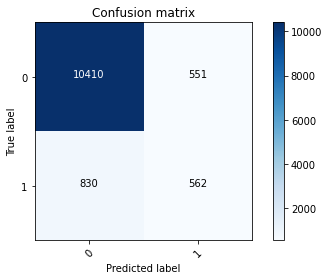

In [144]:
y_pred = xgb_model.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10961
           1       0.50      0.40      0.45      1392

    accuracy                           0.89     12353
   macro avg       0.72      0.68      0.69     12353
weighted avg       0.88      0.89      0.88     12353



Area Under the Receiver Operating Characteristic Curve =  0.7917324366851334


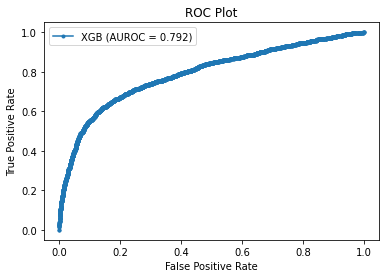

In [146]:
plot_roc_curve(X_test, y_test, xgb_model, 'XGB')

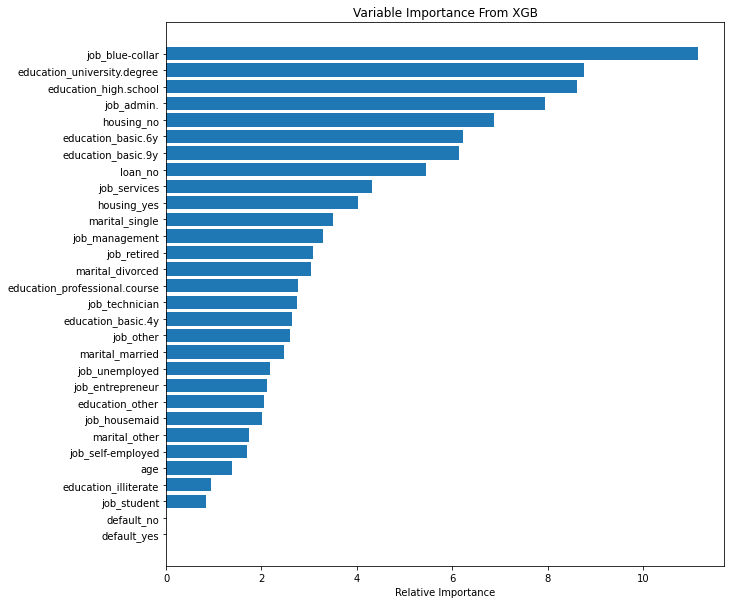

In [147]:
xgb_model.feature_importances_

feature_importance = xgb_model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance From XGB')
plt.show();

In [345]:
perm = PermutationImportance(xgb_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0279 ± 0.0032,nr_employed
0.0121 ± 0.0022,euribor3m
0.0056 ± 0.0009,month_may
0.0031 ± 0.0004,cons_price_idx
0.0025 ± 0.0006,poutcome_failure
0.0024 ± 0.0010,cons_conf_idx
0.0021 ± 0.0013,day_of_week_thu
0.0017 ± 0.0016,day_of_week_mon
0.0014 ± 0.0006,month_apr
0.0012 ± 0.0011,day_of_week_fri


In [167]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba[:,1])
target_names = [' Not Subscrided 0', 'Subscrided 1', ]
report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
report['ROC AUC'] = auc
xgb_report = pd.DataFrame(report).transpose().round(2)
xgb_report['model'] = 'xgb_recall_micro'
xgb_report.set_index(['model', xgb_report.index], inplace=True)
xgb_report

precision  recall  f1-score   support
model                                                                    
xgb_recall_micro  Not Subscrided 0       0.93    0.95      0.94  10961.00
                 Subscrided 1            0.50    0.40      0.45   1392.00
                 accuracy                0.89    0.89      0.89      0.89
                 macro avg               0.72    0.68      0.69  12353.00
                 weighted avg            0.88    0.89      0.88  12353.00
                 ROC AUC                 0.79    0.79      0.79      0.79

## Insights

- The XGBoost model gave a lower performance than the LGBoost model. AUC = 0.79 & recall in the minority class = 0.40, F1_score 0.45.
- This model showed less capability of predicting the minority class (subscribers)
- The performance can possibly be improved by optimizing the hyperparameters.

# Models Summary

In [170]:
lr_report.append([lgbm_report, xgb_report, dt_report, rf_report ])

precision  recall  f1-score  \
model                                                                   
Logistic Regression_F1  Not Subscrided 0       0.95    0.85      0.90   
                       Subscrided 1            0.35    0.64      0.46   
                       accuracy                0.83    0.83      0.83   
                       macro avg               0.65    0.75      0.68   
                       weighted avg            0.88    0.83      0.85   
                       ROC AUC                 0.80    0.80      0.80   
lgbm_recall_micro       Not Subscrided 0       0.94    0.92      0.93   
                       Subscrided 1            0.47    0.57      0.51   
                       accuracy                0.88    0.88      0.88   
                       macro avg               0.71    0.74      0.72   
                       weighted avg            0.89    0.88      0.88   
                       ROC AUC                 0.81    0.81      0.81   
xgb_recall_micro        Not Subscrided 0       0.93    0.95      0.94   
                       Subscrided 1            0.50    0.40      0.45   
                       accuracy                0.89    0.89      0.89   
                       macro avg               0.72    0.68      0.69   
                       weighted avg            0.88    0.89      0.88   
                       ROC AUC                 0.79    0.79      0.79   
DT_recall_micro         Not Subscrided 0       0.93    0.93      0.93   
                       Subscrided 1            0.46    0.48      0.47   
                       accuracy                0.88    0.88      0.88   
                       macro avg               0.70    0.70      0.70   
                       weighted avg            0.88    0.88      0.88   
                       ROC AUC                 0.78    0.78      0.78   
RF_Recall_Micro         Not Subscrided 0       0.93    0.95      0.94   
                       Subscrided 1            0.50    0.40      0.45   
                       accuracy                0.89    0.89      0.89   
                       macro avg               0.72    0.68      0.69   
                       weighted avg            0.88    0.89      0.88   
                       ROC AUC                 0.80    0.80      0.80   

                                           support  
model                                               
Logistic Regression_F1  Not Subscrided 0  10961.00  
                       Subscrided 1        1392.00  
                       accuracy               0.83  
                       macro avg          12353.00  
                       weighted avg       12353.00  
                       ROC AUC                0.80  
lgbm_recall_micro       Not Subscrided 0  10961.00  
                       Subscrided 1        1392.00  
                       accuracy               0.88  
                       macro avg          12353.00  
                       weighted avg       12353.00  
                       ROC AUC                0.81  
xgb_recall_micro        Not Subscrided 0  10961.00  
                       Subscrided 1        1392.00  
                       accuracy               0.89  
                       macro avg          12353.00  
                       weighted avg       12353.00  
                       ROC AUC                0.79  
DT_recall_micro         Not Subscrided 0  10961.00  
                       Subscrided 1        1392.00  
                       accuracy               0.88  
                       macro avg          12353.00  
                       weighted avg       12353.00  
                       ROC AUC                0.78  
RF_Recall_Micro         Not Subscrided 0  10961.00  
                       Subscrided 1        1392.00  
                       accuracy               0.89  
                       macro avg          12353.00  
                       weighted avg       12353.00  
                       ROC AUC                0.80

### Insights:
- The Light Gradient Boosting algorithm optimized for Recall Micro gave the best performance. ROC AUC = 0.81 and F1= 0.51
- This model showed a higher chance of predicting the minority class (subscribers) with Recall of 0.51 on this class.
- Optimizing the hyperparameters on the Recall Micro gave a better performance of most of the models applied on this imbalanced dataset.
- The SMOTE oversampling seemed to be helpful with this imbalanced dataset.

Further work: one can compare applying SMOTE over sampling with under sampling and without sampling.


# Saving the Best Model

#### Fit the model to the entire dataset

In [173]:
lgbm_model.fit(X, y)

LGBMClassifier(class_weight='balanced', colsample_bytree='0.401',
               learning_rate=0.01, n_estimators=20, num_leaves=128,
               objective='binary')

In [178]:
model_name

'LGBMClassifier'

In [179]:
# This code is modified from Springboard Guided project
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
import sklearn
import pickle
from datetime import datetime

def save_model(model):
    
    best_model = model
    model_name = type(model).__name__
    best_model.version = '1.0'
    best_model.pandas_version = pd.__version__
    best_model.numpy_version = np.__version__
    sklearn_version = sklearn.__version__

    best_model.sklearn_version = sklearn_version
    best_model.X_columns = [col for col in X_train.columns]
    best_model.build_datetime = datetime.now()

    modelpath = '../models'
    if not os.path.exists(modelpath):
        os.mkdir(modelpath)
    bankmodel_path = os.path.join(modelpath, model_name+'.pkl')
    if not os.path.exists(bankmodel_path):
        with open(bankmodel_path, 'wb') as f:
            pickle.dump(best_model, f)
    print(f'Model {model_name} is Saved')

In [180]:
save_model(lgbm_model)

Model LGBMClassifier is Saved


In [181]:
save_model(xgb_model)

Model XGBClassifier is Saved


In [182]:
save_model(lr_model)

Model LogisticRegression is Saved


### Loading Saved Model

In [185]:
# This isn't exactly production-grade, but a quick check for development
# These checks can save some head-scratching in development when moving from
# one python environment to another, for example
expected_model_version = '1.0'
model_path = '../models/LGBMClassifier.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [186]:
model

LGBMClassifier(class_weight='balanced', colsample_bytree='0.401',
               learning_rate=0.01, n_estimators=20, num_leaves=128,
               objective='binary')